# TOMOGRAFIA DE RESISTIVIDAD ELÉCTRICA (TRE)

In [78]:
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Modelo Directo

(<Axes: >, None)

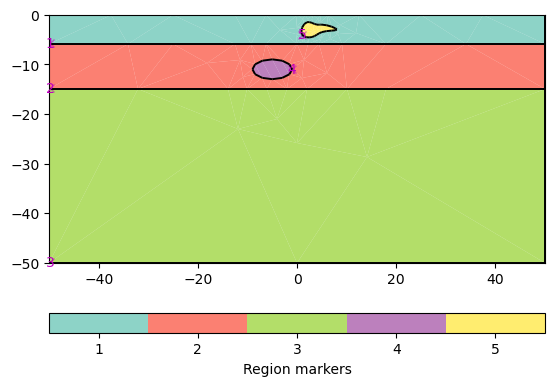

In [60]:
world = mt.createWorld(start=[-50, 0], end=[50,-50], layers=[-6,-15],
                        worldMarker=False)
block = mt.createCircle(pos=[-5,-11], radius=[4,2], marker=4, boundaryMarker=10)
poly = mt.createPolygon([(1, -4),(2,-1.5),
                         (4, -2),(5,-2),
                         (8, -3),(5,-3.5),
                         (3, -4.5)], isClosed=True, marker=5,
                           addNodes=3, interpolate='spline')
geom = world+block+poly
# Mostrar geometria
pg.show(geom)

### Generar datos sinteticos

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f94a5f2730>)

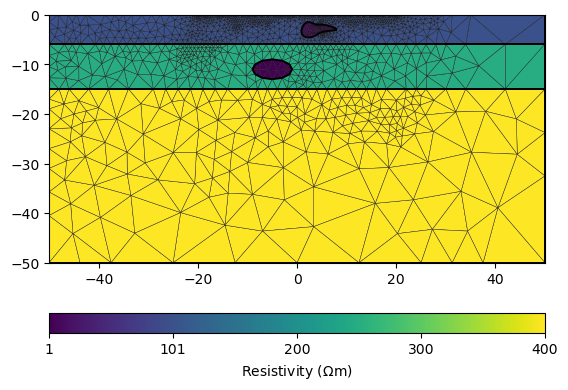

In [55]:
scheme = ert.createData(elecs=np.linspace(start=-20, stop=20, num=32), schemeName='slm') 

#schemeName='dd' Dipolo-Dipolo
#schemeName='slm' Slumberger

for p in scheme.sensors():
    geom.createNode(p)
    geom.createNode(p - [0, 0.1])

mesh = mt.createMesh(geom, quality=34)

rhomap = [[1, 100], [2, 250], [3, 400], [4, 1], [5, 10]]

pg.show(mesh, data=rhomap, label=pg.unit('res'), showMesh=True)

### Simulación de adquisición

### Generación de datos sinteticos

In [56]:
data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiselevel=1, seed=1337, noiseAbs=1e-6)

pg.info(np.linalg.norm(data['err']), np.linalg.norm(data['rhoa']))
pg.info('Simulated data', data)
pg.info('The data contains:', data.dataMap().keys())

pg.info('Simulated rhoa (min/max)', min(data['rhoa']), max(data['rhoa']))
pg.info('Selected data noise %(min/max)', min(data['err'])*100, max (data['err'])*100)

#Control de calidad

data.remove(data['rhoa'] < 0)

data.save('datos_tre/synth_data.dat')


20/02/24 - 09:51:17 - pyGIMLi - INFO - 0.0 1519.8359822841007
20/02/24 - 09:51:17 - pyGIMLi - INFO - Simulated data Data: Sensors: 32 data: 225, nonzero entries: ['a', 'b', 'k', 'm', 'n', 'rhoa', 'valid']
20/02/24 - 09:51:17 - pyGIMLi - INFO - The data contains: ['a', 'b', 'err', 'i', 'ip', 'iperr', 'k', 'm', 'n', 'r', 'rhoa', 'u', 'valid']
20/02/24 - 09:51:17 - pyGIMLi - INFO - Simulated rhoa (min/max) 54.03269579139972 164.48023621099713
20/02/24 - 09:51:17 - pyGIMLi - INFO - Selected data noise %(min/max) 0.0 0.0


1

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1f94a5dff70>)

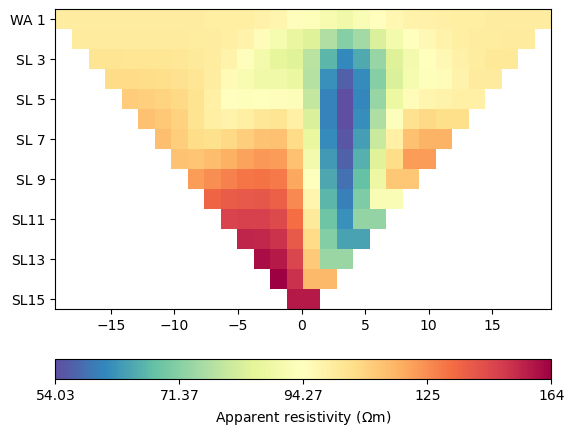

In [57]:
ert.showData(data)

In [58]:
data["k"] = ert.geometricFactors(data)
data["err"] = ert.estimateError(data, relativeError=0.03, absoluteError=50e-6)

mgr = ert.ERTManager(data)

inv = mgr.invert(verbose=True)



20/02/24 - 09:51:19 - pyGIMLi - INFO - Found 2 regions.
20/02/24 - 09:51:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/02/24 - 09:51:19 - pyGIMLi - INFO - Found 2 regions.
20/02/24 - 09:51:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/02/24 - 09:51:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/02/24 - 09:51:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/02/24 - 09:51:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1381 Cells: 2576 Boundaries: 2024
20/02/24 - 09:51:19 - pyGIMLi - INFO - Use median(data values)=100.02293908139448
20/02/24 - 09:51:19 - pyGIMLi - INFO - Created startmodel from forward operator: 487, min/max=100.022939/100.022939
20/02/24 - 09:51:19 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F941E07590>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F941E079A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F941E07040>
min/max (data): 54.03/164
min/max (error): 3%/3%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =   60.24
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    2.22 (dPhi = 94.97%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.37 (dPhi = 61.03%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.37)                   #
################################################################################


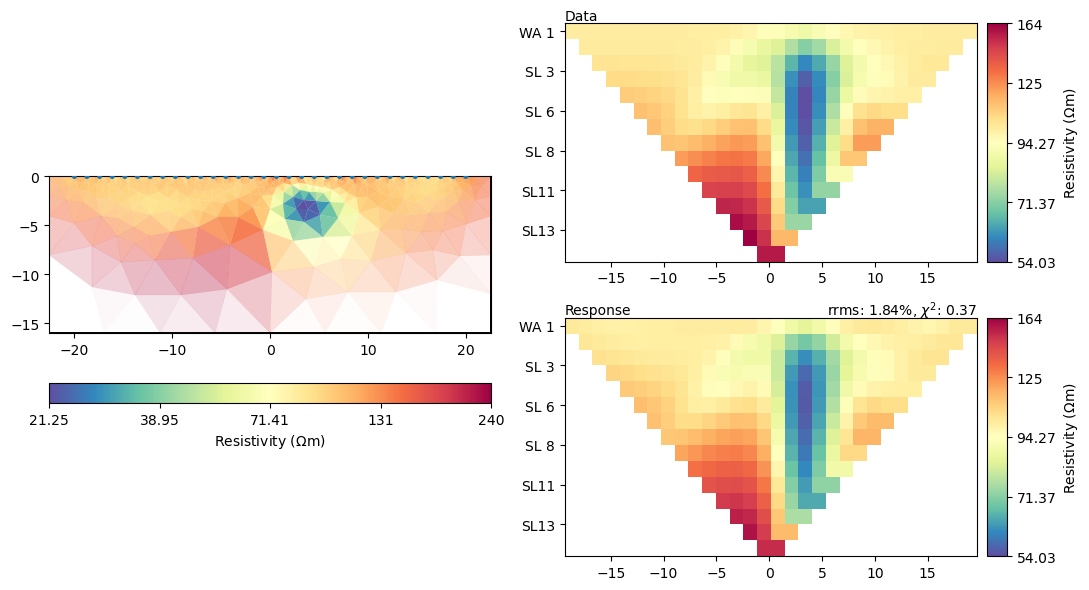

In [59]:
mgr.showResultAndFit()
plt.show()

## Modelado Inverso de Datos Reales

### Caso 1

In [63]:
data1 = ert.load('datos_tre/Datos_reales_1.dat')
print(data1)

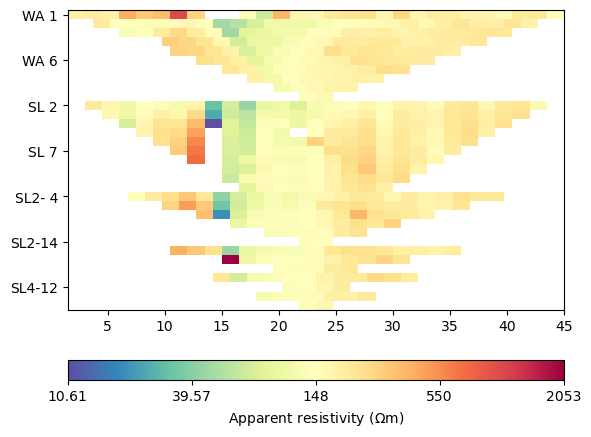

In [65]:
ax, cb = ert.show(data1)

In [76]:
data1['k'] = ert.geometricFactors(data1)
data1['err'] = ert.estimateError(data1, relativeError=0.02, absoluteError=50e-6)
mgr1 = ert.ERTManager(data1, verbose=True)
inv1 = mgr1.invert(verbose=True)
inv1

20/02/24 - 15:03:43 - pyGIMLi - INFO - Found 2 regions.
20/02/24 - 15:03:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/02/24 - 15:03:43 - pyGIMLi - INFO - Found 2 regions.
20/02/24 - 15:03:43 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/02/24 - 15:03:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/02/24 - 15:03:43 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/02/24 - 15:03:43 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1523 Cells: 2848 Boundaries: 2234
20/02/24 - 15:03:43 - pyGIMLi - INFO - Use median(data values)=179.75
20/02/24 - 15:03:43 - pyGIMLi - INFO - Created startmodel from forward operator: 492, min/max=179.750000/179.750000
20/02/24 - 15:03:43 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001F9522EF4A0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001F9522EF5E0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001F9522EF540>
min/max (data): 10.61/2053
min/max (error): 2%/2%
min/max (start model): 180/180
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  560.33
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  214.62 (dPhi = 60.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  132.68 (dPhi = 36.99%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   95.01 (dPhi = 25.95%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   92.96 (dPhi = 2.37%) lam: 20.0
------------------

492 [1724.5603931439969,...,137.14229789065692]

<Axes: ylabel='Count'>

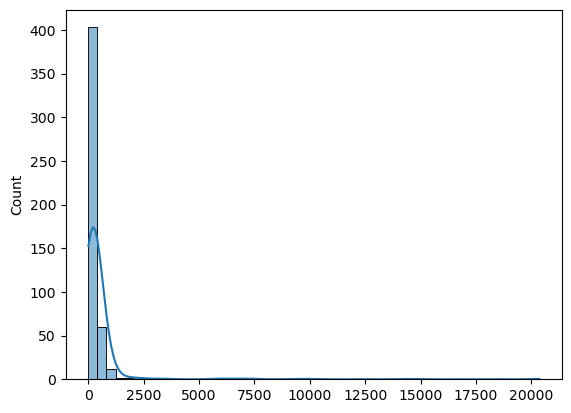

In [89]:
sns.histplot(inv1, bins=50, kde=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13996\422973114.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(inv1, shade=True)


<Axes: ylabel='Density'>

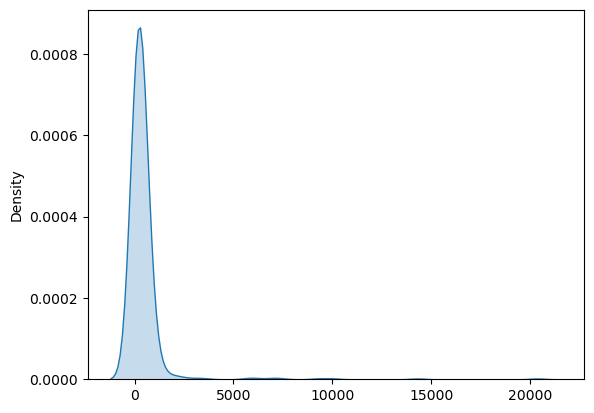

In [91]:
sns.kdeplot(inv1, shade=True)

(-10.0, 0.0)

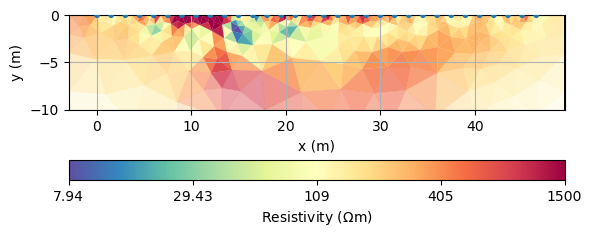

In [100]:
kw = dict(logScale=True, cMap='Spectral_r', xlabel='x (m)', ylabel='y (m)', cMin=0, cMax=1500)
ax, cb = mgr1.showResult(**kw)
ax.grid(True)
ax.set_ylim([-10, ax.get_ylim()[1]])

### Caso 2

In [117]:
data2 = ert.load('datos_tre/Datos_reales_2.txt')
print(data2)


Data: Sensors: 81 data: 944, nonzero entries: ['a', 'b', 'm', 'n', 'r', 'valid']


In [118]:
data2["k"] = ert.geometricFactors(data2)
data2["rhoa"] = data2("r") * data2("k")



In [119]:
data2["err"] = ert.estimateError(data2, relativeError=0.02, absoluteError=50e-6)

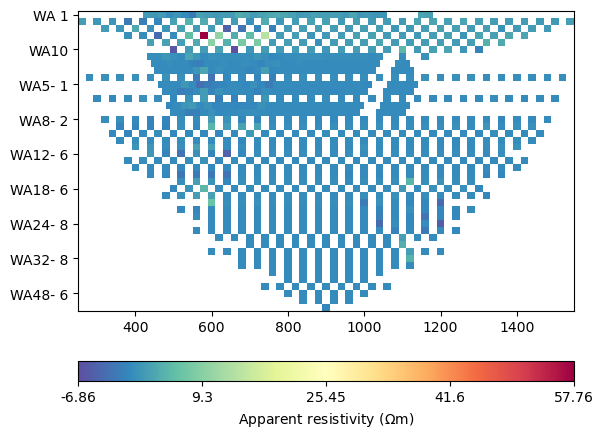

In [120]:
ax, cb = ert.show(data2)

In [ ]:
mgr2 = ert.ERTManager(data2, verbose=True)
inv2 = mgr2.invert(verbose=True)